<a href="https://colab.research.google.com/github/Ohellay/arbitrary/blob/main/Credit_information_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Problem 1] Confirmation of competition contents

1. What to learn and what to predict?

The task is to predict the probability of default for a given loan application. You need to learn the patterns and relationships between the features and the target variable (default probability) to make accurate predictions.

2. What kind of file to create and submit to Kaggle?

You need to submit a CSV file containing your predictions. The file should have the following format:

- SK_ID_CURR: the unique identifier for each loan application (same as in the test data)
- TARGET: the predicted probability of default (between 0 and 1)

3. What kind of index value will be used to evaluate the submissions?

The submissions will be evaluated using the Area Under the Receiver Operating Characteristic Curve (ROC-AUC) score. The ROC-AUC score measures the ability of your model to distinguish between defaulting and non-defaulting loans.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# Load the data
test_df = pd.read_csv("C:/Users/Olasunkanmi/Documents/application_test.csv")
train_df = pd.read_csv("C:/Users/Olasunkanmi/Documents/application_train.csv")


train_df.shape, test_df.shape, train_df.size, train_df.size ,

((307511, 122), (48744, 121), 37516342, 37516342)

In [ ]:
train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
 train_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
test_df.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
 test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [ ]:
train_df ['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

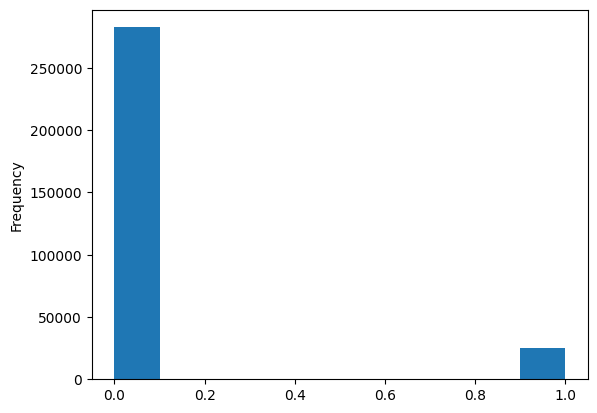

In [ ]:
train_df ['TARGET'].plot.hist()

<Axes: >

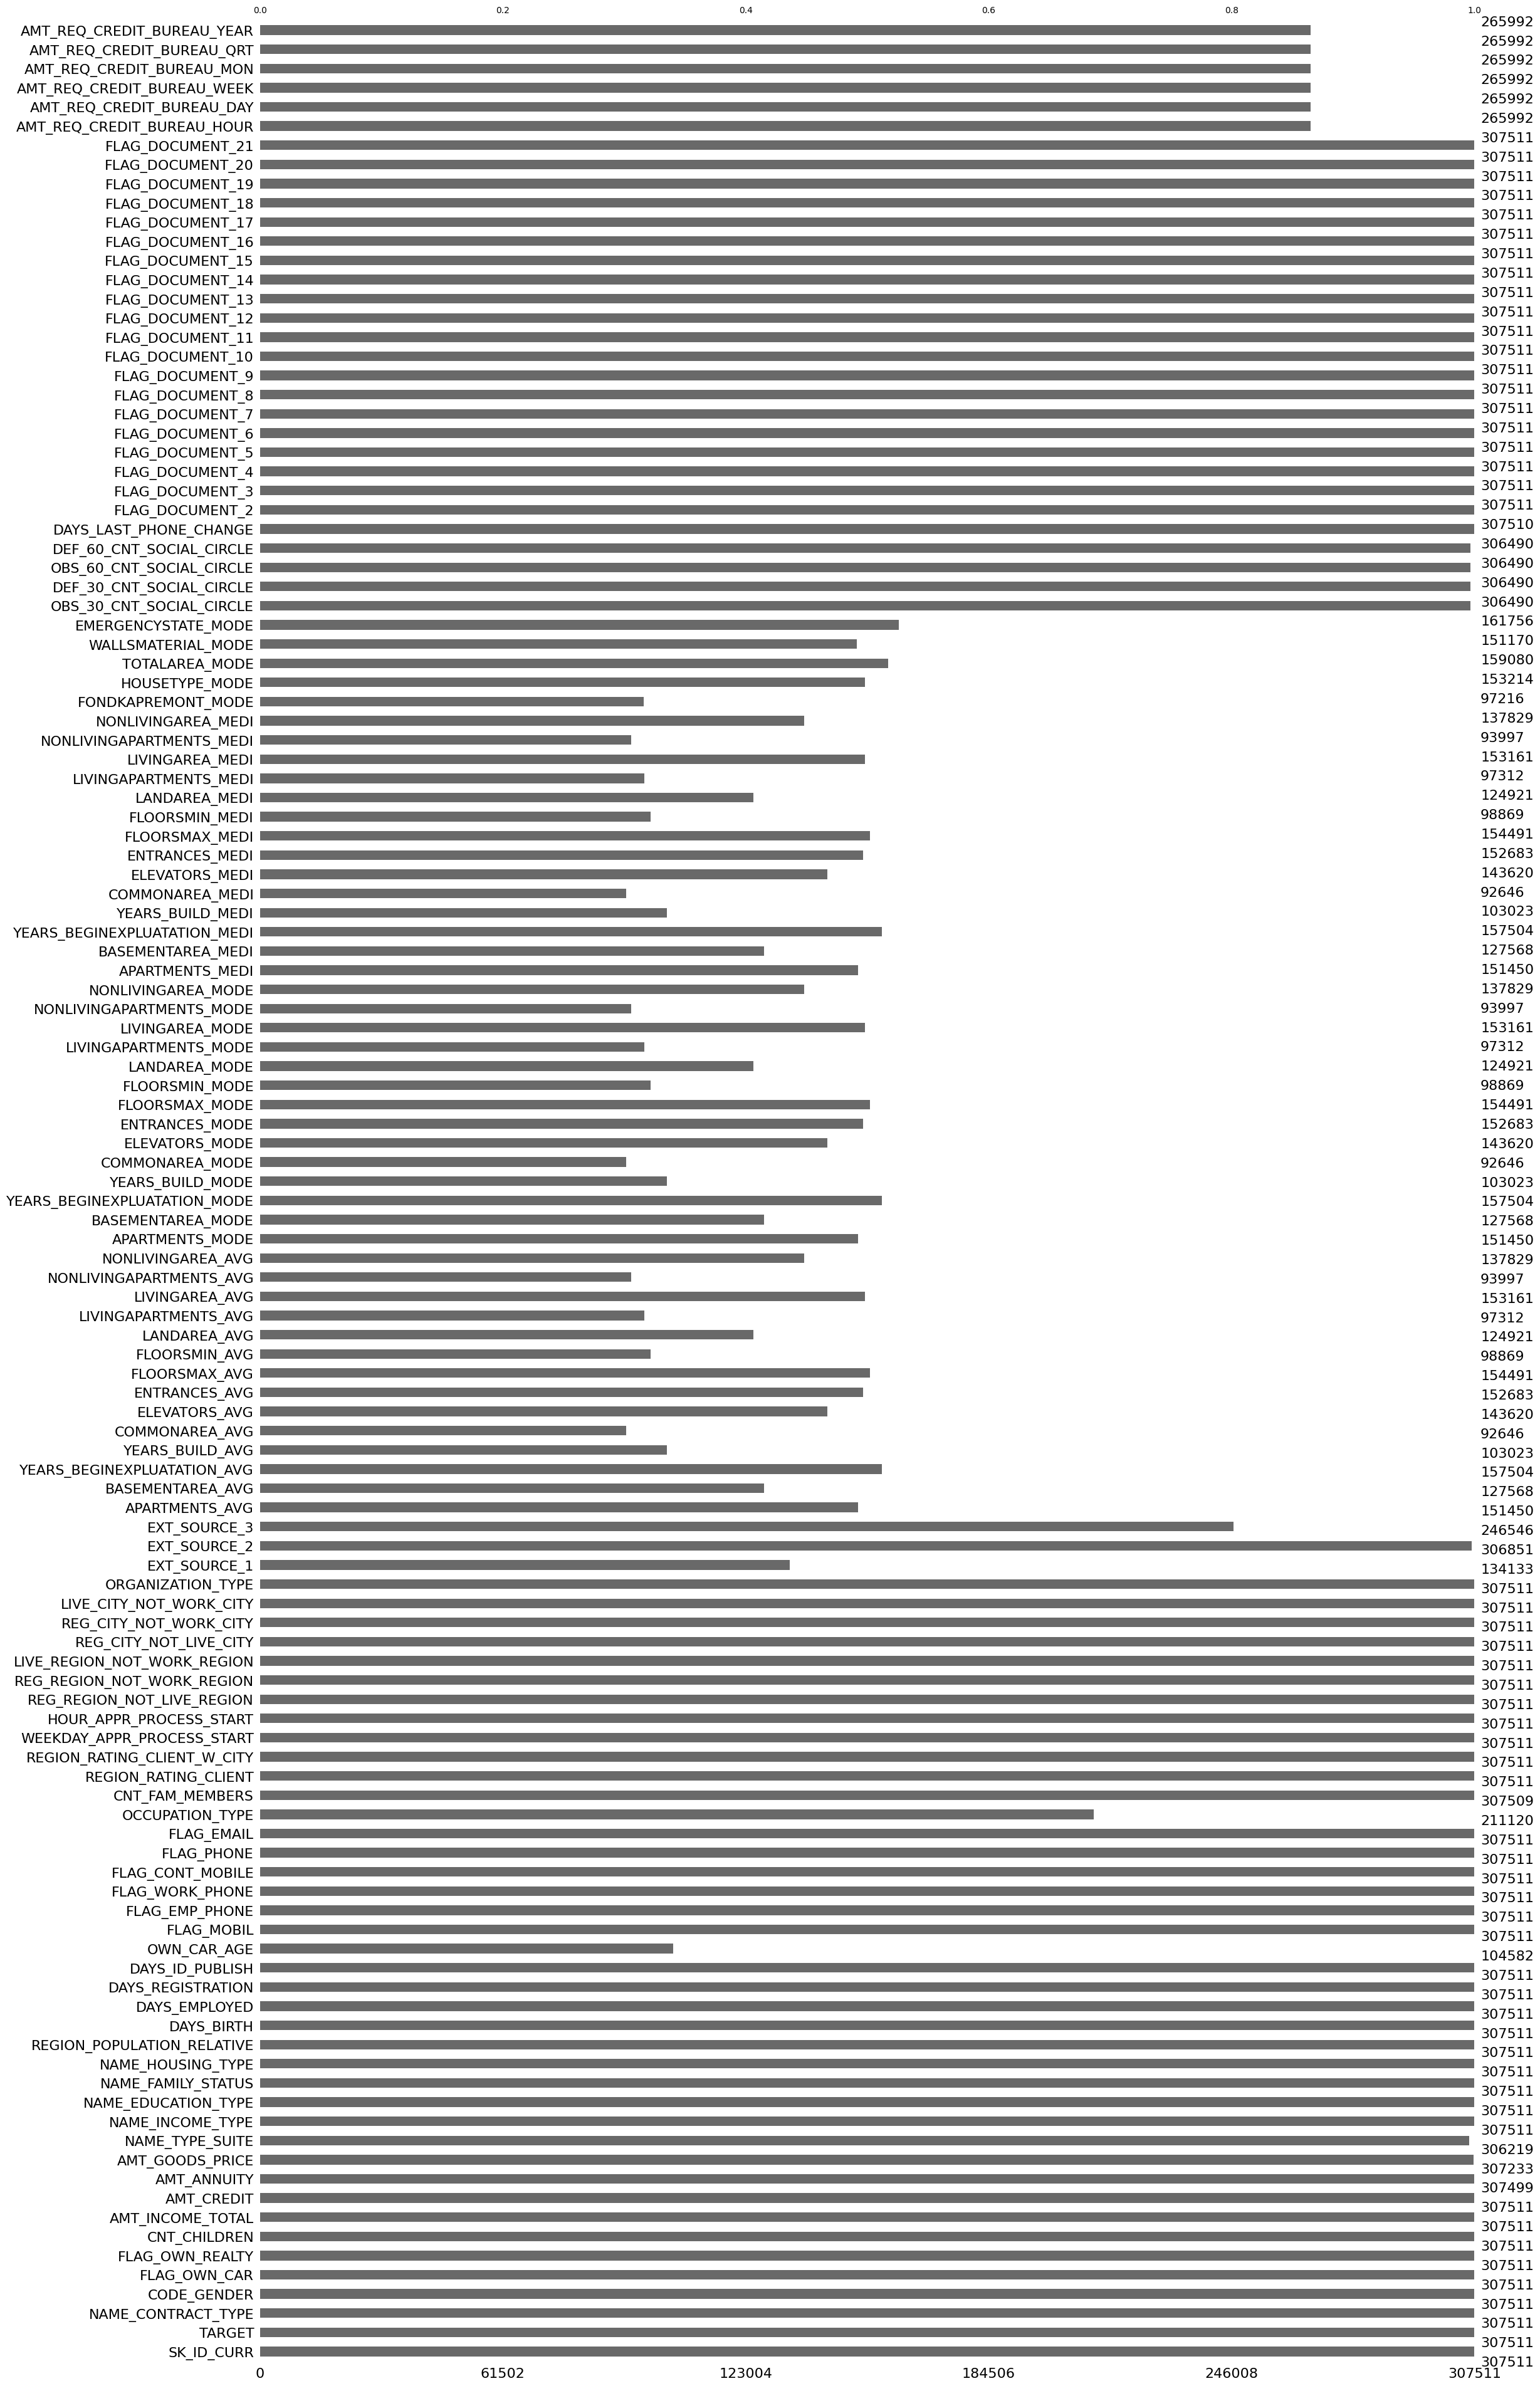

In [ ]:
#Visualize  missinf data
msno.bar(train_df)

In [ ]:
# List of missing number only
not_missing_value = 0
missing_number = train_df.isnull().sum().sort_values(ascending=False)
missing_number_only = missing_number[ missing_number > not_missing_value]
print(f"The list of missing number only")
print(f"{missing_number_only}")

The list of missing number only
COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
EXT_SOURCE_2                   660
AMT_GOODS_PRICE                278
AMT_ANNUITY                     12
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
Length: 67, dtype: int64


In [ ]:
percentage = (missing_number/train_df.isnull().count()*100)
missing_data = pd.concat([missing_number, percentage],axis=1,keys=["Total","Percentage"])
print("Percentage of missing Values::")
print(round(missing_data, 2), "%")

null_table =missing_data[missing_data.iloc[:,1] >0 ]
null_table

Percentage of missing Values::
                           Total  Percentage
COMMONAREA_MEDI           214865       69.87
COMMONAREA_AVG            214865       69.87
COMMONAREA_MODE           214865       69.87
NONLIVINGAPARTMENTS_MODE  213514       69.43
NONLIVINGAPARTMENTS_AVG   213514       69.43
...                          ...         ...
NAME_HOUSING_TYPE              0        0.00
NAME_FAMILY_STATUS             0        0.00
NAME_EDUCATION_TYPE            0        0.00
NAME_INCOME_TYPE               0        0.00
SK_ID_CURR                     0        0.00

[122 rows x 2 columns] %


,Total,Percentage
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
...,...,...
EXT_SOURCE_2,660,0.214626
AMT_GOODS_PRICE,278,0.090403
AMT_ANNUITY,12,0.003902
CNT_FAM_MEMBERS,2,0.000650


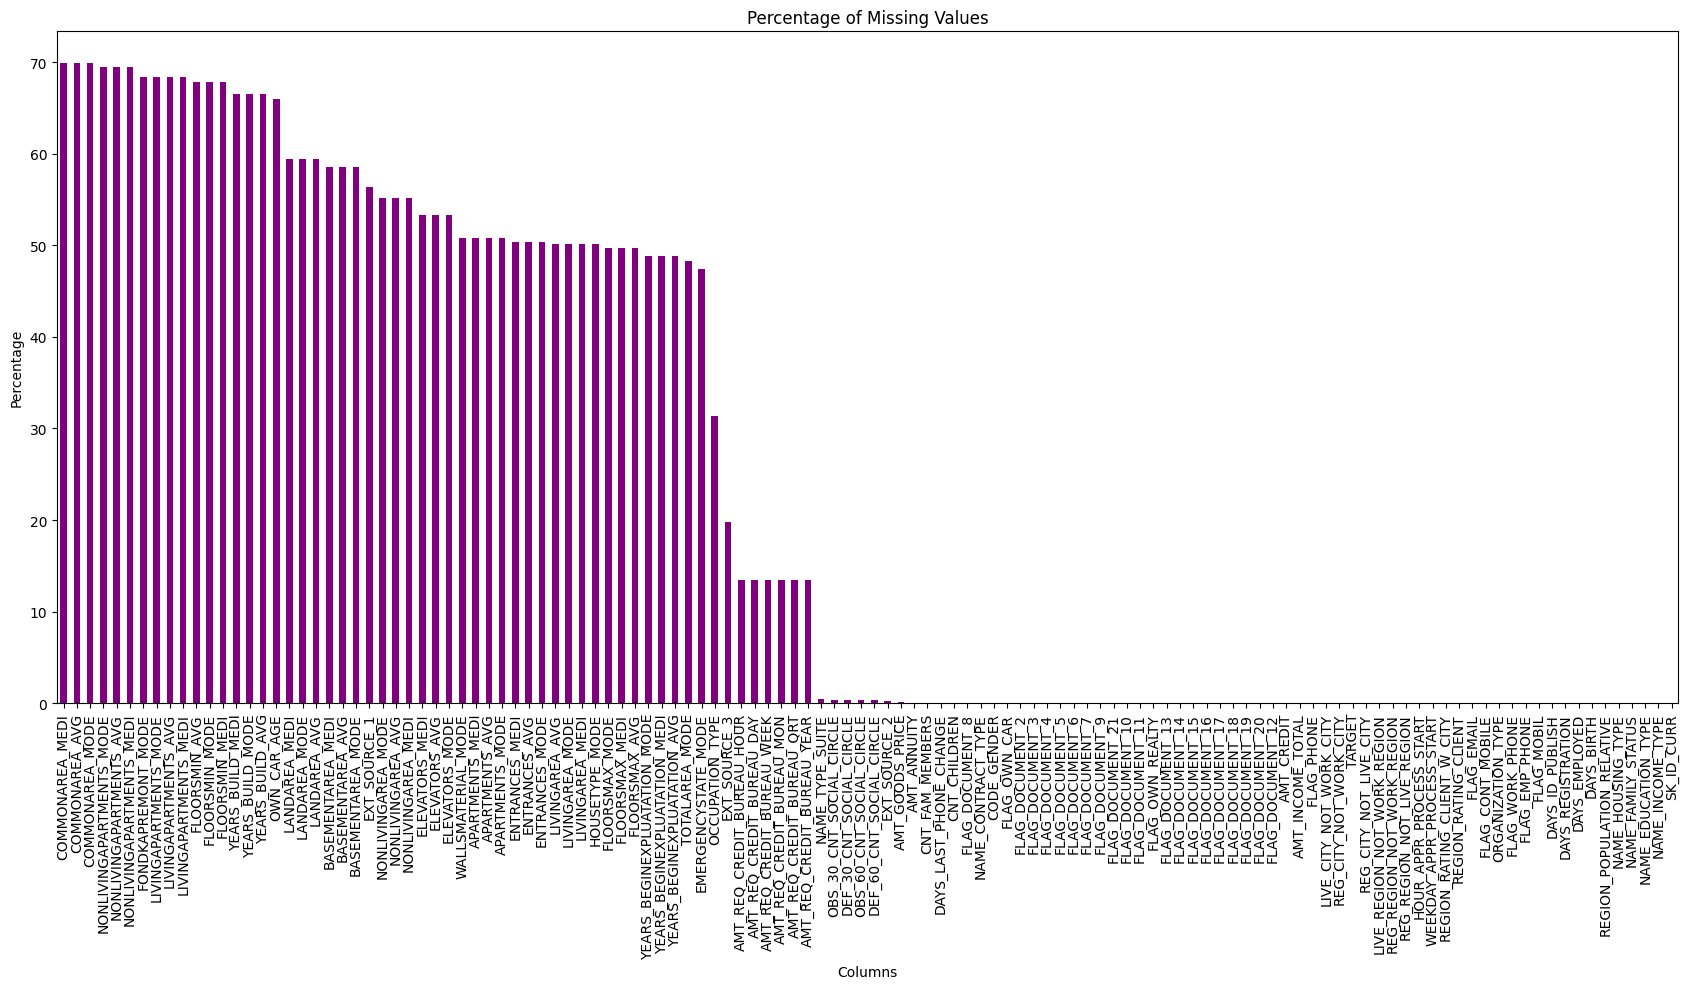

In [ ]:
# This shows a bar plot for the percentage of missing values

plt.figure(figsize=(17, 10))
missing_data['Percentage'].plot(kind='bar', color='purple')
plt.title('Percentage of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()

In [ ]:
train_df.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [ ]:
test_df.dtypes.value_counts()

float64    65
int64      40
object     16
Name: count, dtype: int64

In [ ]:
# Number of unique classes in each object column
train_df.select_dtypes('object').apply(pd.Series.nunique,axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [ ]:
train_df.select_dtypes("object")

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services,reg oper account,block of flats,"Stone, brick",No
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,MONDAY,XNA,reg oper account,block of flats,"Stone, brick",No
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School,reg oper account,block of flats,Panel,No
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,NaN,block of flats,"Stone, brick",No


In [ ]:
train_df[["DAYS_BIRTH"]] = train_df[["DAYS_BIRTH"]]/ -365
train_df[["DAYS_REGISTRATION"]] = train_df[["DAYS_REGISTRATION"]] / -365
train_df[["DAYS_ID_PUBLISH"]] = train_df[["DAYS_ID_PUBLISH"]] / -365
train_df[["DAYS_LAST_PHONE_CHANGE"]] = train_df [["DAYS_LAST_PHONE_CHANGE"]]/ -365

In [ ]:
# Create an anomalous flag column
train_df["DAYS_EMPLOYED_ANOM"] = train_df ["DAYS_EMPLOYED"] == 365243

# Replace the anomalous value with nan
train_df["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace=True)

test_df["DAYS_EMPLOYED_ANOM"] = test_df["DAYS_EMPLOYED"] == 365243
test_df["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace=True)

In [ ]:
drop_null = null_table[null_table['Percentage']> 0.1].index
app_train = train_df.drop(drop_null, axis=1)
miss_val = app_train.isnull().sum().sort_values(ascending = False)
miss_val [miss_val > 10]


DAYS_EMPLOYED      55374
AMT_GOODS_PRICE      278
AMT_ANNUITY           12
dtype: int64

In [ ]:
# selecting object data types
object_train_df  = app_train.select_dtypes('object')
object_train_df

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Working,Secondary / secondary special,Single / not married,House / apartment,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,State servant,Higher education,Married,House / apartment,MONDAY,School
2,Revolving loans,M,Y,Y,Working,Secondary / secondary special,Single / not married,House / apartment,MONDAY,Government
3,Cash loans,F,N,Y,Working,Secondary / secondary special,Civil marriage,House / apartment,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Working,Secondary / secondary special,Single / not married,House / apartment,THURSDAY,Religion
...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Working,Secondary / secondary special,Separated,With parents,THURSDAY,Services
307507,Cash loans,F,N,Y,Pensioner,Secondary / secondary special,Widow,House / apartment,MONDAY,XNA
307508,Cash loans,F,N,Y,Working,Higher education,Separated,House / apartment,THURSDAY,School
307509,Cash loans,F,N,Y,Commercial associate,Secondary / secondary special,Married,House / apartment,WEDNESDAY,Business Entity Type 1


In [ ]:
# check for the remaining objet value after removing missing value
object_train_df.isnull().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64

In [ ]:
app_test = test_df.drop(drop_null, axis=1)
object_test_df  = app_test.select_dtypes('object')
object_test_df

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,F,N,Y,Working,Higher education,Married,House / apartment,TUESDAY,Kindergarten
1,Cash loans,M,N,Y,Working,Secondary / secondary special,Married,House / apartment,FRIDAY,Self-employed
2,Cash loans,M,Y,Y,Working,Higher education,Married,House / apartment,MONDAY,Transport: type 3
3,Cash loans,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,Y,N,Working,Secondary / secondary special,Married,House / apartment,FRIDAY,Business Entity Type 3
...,...,...,...,...,...,...,...,...,...,...
48739,Cash loans,F,N,Y,Working,Secondary / secondary special,Widow,House / apartment,WEDNESDAY,Other
48740,Cash loans,F,N,N,Commercial associate,Secondary / secondary special,Married,House / apartment,MONDAY,Trade: type 7
48741,Cash loans,F,Y,Y,Commercial associate,Secondary / secondary special,Married,House / apartment,WEDNESDAY,Business Entity Type 3
48742,Cash loans,M,N,N,Commercial associate,Higher education,Married,House / apartment,MONDAY,Self-employed


In [ ]:
missing_valu  = app_test.isnull().sum().sort_values(ascending = False)
missing_valu [missing_valu > 10]

DAYS_EMPLOYED    9274
AMT_ANNUITY        24
dtype: int64

In [ ]:
# Drop remaining missing value in the test data
drop_missing_val = object_test_df.isnull().sum()

drop_missing_value = drop_missing_val[drop_missing_val > 0]

drop_missing_value

Series([], dtype: int64)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lae = LabelEncoder()

object_train = app_train.dtypes[app_train.dtypes == 'object'].index
object_train

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [ ]:
for i in object_train:
    app_train[i] = lae.fit_transform(app_train[i])
    app_test[i] = lae.fit_transform(app_test[i])


In [ ]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 60 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  int64  
 3   CODE_GENDER                  307511 non-null  int64  
 4   FLAG_OWN_CAR                 307511 non-null  int64  
 5   FLAG_OWN_REALTY              307511 non-null  int64  
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  int64  
 12  NAME_EDUCATION_TYPE          307511 non-null  int64  
 13 

In [ ]:
app_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   48744 non-null  int64  
 1   NAME_CONTRACT_TYPE           48744 non-null  int64  
 2   CODE_GENDER                  48744 non-null  int64  
 3   FLAG_OWN_CAR                 48744 non-null  int64  
 4   FLAG_OWN_REALTY              48744 non-null  int64  
 5   CNT_CHILDREN                 48744 non-null  int64  
 6   AMT_INCOME_TOTAL             48744 non-null  float64
 7   AMT_CREDIT                   48744 non-null  float64
 8   AMT_ANNUITY                  48720 non-null  float64
 9   AMT_GOODS_PRICE              48744 non-null  float64
 10  NAME_INCOME_TYPE             48744 non-null  int64  
 11  NAME_EDUCATION_TYPE          48744 non-null  int64  
 12  NAME_FAMILY_STATUS           48744 non-null  int64  
 13  NAME_HOUSING_TYP

In [ ]:
#checking for missing value
app_train.isna().sum()[app_train.isna().sum() > 0]

AMT_ANNUITY                  12
AMT_GOODS_PRICE             278
DAYS_EMPLOYED             55374
CNT_FAM_MEMBERS               2
DAYS_LAST_PHONE_CHANGE        1
dtype: int64

In [ ]:
app_train['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [ ]:
app_test['AMT_ANNUITY']

0        20560.5
1        17370.0
2        69777.0
3        49018.5
4        32067.0
          ...   
48739    17473.5
48740    31909.5
48741    33205.5
48742    25128.0
48743    24709.5
Name: AMT_ANNUITY, Length: 48744, dtype: float64

In [ ]:
#data cleaning
train_col = app_train.columns
train_col

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG

In [ ]:
cols = train_col.drop('TARGET')


In [ ]:
for i in  cols:
    app_train[i] = app_train[i].fillna((app_train[i].mean()))
    app_test[i] =  app_test[i].fillna((app_test[i].mean()))

In [ ]:
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,DAYS_EMPLOYED_ANOM
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,False
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,False
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,False
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,False
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,1,0,0,0,157500.0,254700.0,27558.0,...,0,0,0,0,0,0,0,0,0,False
307507,456252,0,0,0,0,1,0,72000.0,269550.0,12001.5,...,0,0,0,0,0,0,0,0,0,True
307508,456253,0,0,0,0,1,0,153000.0,677664.0,29979.0,...,0,0,0,0,0,0,0,0,0,False
307509,456254,1,0,0,0,1,0,171000.0,370107.0,20205.0,...,0,0,0,0,0,0,0,0,0,False


In [ ]:
app_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,DAYS_EMPLOYED_ANOM
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0,0,0,0,0,False
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0,0,0,0,0,False
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0,0,0,0,0,False
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0,0,0,0,0,False
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,0,0,1,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0,0,0,0,0,False
48740,456222,0,0,0,0,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,0,0,0,0,0,False
48741,456223,0,0,1,1,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0,0,0,0,0,False
48742,456224,0,1,0,0,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0,0,0,0,0,False


In [ ]:
X = app_train[cols]
y = app_train["TARGET"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state= 49)

In [ ]:
# LEARNING AND ESTIMATION
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('Prediction:', y_pred_dt)
# Evaluation
auc = roc_auc_score(y_test, y_pred_dt)
print(f'ROC_AUC_SCORE:', auc)

Prediction: [0 0 0 ... 1 0 0]
ROC_AUC_SCORE: 0.5228313596758237


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf= rf.predict(X_test)
print('Prediction:', y_pred_rf)
# Evaluation
auc_rf = roc_auc_score(y_test, y_pred_rf)
print(f'ROC_AUC_SCORE:', auc_rf)

Prediction: [0 0 0 ... 0 0 0]
ROC_AUC_SCORE: 0.5


[ESTIMATION ON TEST DATA] [PROBLEM 3]

In [ ]:
print('Train', app_train.shape)
print('Test', app_test.shape)

Train (307511, 60)
Test (48744, 59)


In [ ]:
test = scaler.fit_transform(app_test)

In [ ]:
test = scaler.fit_transform(app_test)
# Predict using Decision tree

y_pred_dt1 = dt.predict(test)

y_pred_dt1.shape

(48744,)

In [ ]:
app_test['TARGET'] = y_pred_dt1

result_dt =  app_test.loc[:, ('SK_ID_CURR','TARGET')]
result_dt.head()

,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0


In [ ]:
result_dt.to_csv("result_dt.csv", index=False)

 # [PROBLEM 4] Feature_Engineering

## Feature Importance

In [ ]:
#use unbuilt  class feature_importances of tree based classifiers

print(dt.feature_importances_)

feature_importances = pd.DataFrame(dt.feature_importances_, index=X.columns)

[8.13141893e-02 2.55436514e-03 4.97535597e-03 6.69522829e-03
 7.54518497e-03 8.41615744e-03 5.49296425e-02 5.49815090e-02
 6.83882526e-02 3.97046222e-02 9.15445152e-03 8.67972665e-03
 1.80391555e-02 9.88271319e-03 5.04508573e-02 8.11422959e-02
 7.59607562e-02 8.05741401e-02 7.88423645e-02 0.00000000e+00
 4.94725324e-04 6.73407623e-03 6.19294065e-04 6.44219778e-03
 4.42726941e-03 1.40550421e-02 4.28071998e-03 4.99414243e-03
 2.69440866e-02 4.24237075e-02 2.02517095e-03 2.21428773e-03
 3.08530280e-03 5.60002744e-03 4.87317193e-03 5.46675749e-03
 3.74842678e-02 6.90936535e-02 1.04963491e-04 4.23620746e-03
 0.00000000e+00 1.84478331e-03 2.41368545e-03 4.15305219e-05
 2.02771099e-03 9.62132641e-04 0.00000000e+00 3.47093089e-04
 0.00000000e+00 2.82255099e-04 3.32196891e-04 1.73290002e-04
 1.13501760e-03 1.07150848e-04 1.25179884e-03 2.59454406e-04
 1.76503571e-04 2.71455633e-04 5.43900562e-04]


In [ ]:
feature_importances.head()

,0
SK_ID_CURR,0.081314
NAME_CONTRACT_TYPE,0.002554
CODE_GENDER,0.004975
FLAG_OWN_CAR,0.006695
FLAG_OWN_REALTY,0.007545


In [ ]:
selected_features = feature_importances.head(20).index
selected_features

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL'],
      dtype='object')

In [ ]:
x1 =app_train[selected_features[0:2]]
x2 =app_train[selected_features[0:4]]
x3 =app_train[selected_features[0:8]]
x4 =app_train[selected_features[0:10]]
x5 =app_train[selected_features[0:16]]
x6 =app_train[selected_features[0:20]]
x7 = app_train[selected_features]

In [ ]:
def feature(X,feature):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state= 44)
    scaler  = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    dtree = DecisionTreeClassifier()
    dtree.fit(X_train, y_train)
    y_pred_dtree = dtree.predict(X_test)
    roc_auc_score(y_test, y_pred_dtree)
    print(f'ROC score for {feature} is: {roc_auc_score(y_test, y_pred_dtree)}')

In [ ]:
feature(x1, 'x1)')

ROC score for x1) is: 0.49786712241208564


In [ ]:
feature(x2, 'x2)')

ROC score for x2) is: 0.5039813308566857


In [ ]:
feature(x3, 'x3')

ROC score for x3 is: 0.5112684111507257


In [ ]:
feature(x4, 'x4)')

ROC score for x4) is: 0.5181821045144054


In [ ]:
feature(x5, 'x5)')

ROC score for x5) is: 0.5183085277409217


In [ ]:
feature(x6, 'x6)')

ROC score for x6) is: 0.5174038848700264


In [ ]:
feature(x7, 'x7)')

ROC score for x7) is: 0.5197964365576997


# Estimating for the most accurate features

In [ ]:
x5, app_test = x5.align(app_test, join = 'inner', axis=1)

In [ ]:
app_test.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH'],
      dtype='object')

In [ ]:
test_1 = scaler.fit_transform(app_test)
y =app_train[['TARGET']]
X5_train, X5_test, y_train, y_test = train_test_split(x5,y, test_size=0.25)

In [ ]:
scaler  = StandardScaler()
scaler.fit(X5_train)
X6_train = scaler.transform(X5_train)
X6_test = scaler.transform(X5_test)

In [ ]:
dtr = DecisionTreeClassifier()
dtr.fit(X5_train, y_train)
y_pred_dtr = dtr.predict(test_1)
y_pred_dtr

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
result_df2 = app_test[['SK_ID_CURR']]
result_df2['TARGET'] = y_pred_dtr

result2 = result_df2
result2.to_csv("result2.csv", index=False)

In [ ]:
result2

,SK_ID_CURR,TARGET
0,100001,1
1,100005,1
2,100013,1
3,100028,1
4,100038,1
...,...,...
48739,456221,1
48740,456222,1
48741,456223,1
48742,456224,1
